In [1]:
from tradingSimulator import TradingSimulator
simulator = TradingSimulator()

In [ ]:
# strategy in {
#     'Buy and Hold',
#     'Sell and Hold',
#     'Trend Following Moving Averages',
#     'Mean Reversion Moving Averages',
#     'TDQN'
# }
# cryptocurrency in {'Bitcoin', 'Ethereum'}
# network in {"DQN", "LSTM", "BiLSTM", "DuelingDQN", "ConvDuelingDQN"}

In [ ]:
cryptocurrency = "Bitcoin"
simulator.exploratoryDataAnalysis(cryptocurrency, '2014-01-01', '2021-01-01')

In [3]:
percentageCosts = [0, 0.1, 0.2]
transactionCosts = percentageCosts[1]/100
stateLength = 30
AI_TRAINING_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2017-01-01',
    'money': 100000,
    'percentageCosts': percentageCosts,
    'transactionCosts': transactionCosts,
    'name': 'training',
    'network': 'DQN',
    # Parameters related to the DQN algorithm
    'stateLength': stateLength,
    'numberOfEpisodes': 50,
    'gamma': 0.4,
    'learningRate': 0.0001,
    'targetNetworkUpdate': 1000,
    'learningUpdatePeriod': 1,
    # Default parameters related to the Experience Replay mechanism
    'capacity': 100000,
    'batchSize': 32,
    'experiencesRequired': 1000,
    # Default parameters related to the Deep Neural Network
    'numberOfNeurons': 512,
    'dropout': 0.2,
    # Default parameters related to the Epsilon-Greedy exploration technique
    'epsilonStart': 1.0,
    'epsilonEnd': 0.01,
    'epsilonDecay': 10000,
    # Default parameters regarding the sticky actions RL generalization technique
    'alpha': 0.1,
    # Default parameters related to preprocessing
    'filterOrder': 5,
    # Default paramters related to the clipping of both the gradient and the RL rewards
    'gradientClipping': 1,
    'rewardClipping': 1,
    # Default parameter related to the L2 Regularization 
    'L2Factor': 0.000001,
}

NON_AI_TRAINING_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2017-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'percentageCosts': percentageCosts,
    'transactionCosts': transactionCosts,
    'name': 'training',
    'network': ''
}

VALIDATION_PARAM = {
    'startingDate': '2017-01-01',
    'endingDate': '2019-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': transactionCosts,
    'name': 'validation',
    'network': '',
}

BACKTEST_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2021-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': transactionCosts,
    'name': 'backtest',
    'network': '',
}

TEST_PARAM = {
    'startingDate': '2019-01-01',
    'endingDate': '2021-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': transactionCosts,
    'name': 'test',
    'network': '',
}

ETH_TEST_PARAM = {
    'startingDate': '2019-01-01',
    'endingDate': '2021-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': transactionCosts,
    'name': 'test',
    'network': '',
}

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
AI_TRAINING_PARAM['network'] = 'LSTM'
AI_TRAINING_PARAM['name'] = 'btc_tdqn_lstm_training'
VALIDATION_PARAM['network'] = 'LSTM'
VALIDATION_PARAM['name'] = 'btc_tdqn_lstm_validation'
simulator.aiTrainWithCrossValidation(strategy, trainCryptocurrency, AI_TRAINING_PARAM, VALIDATION_PARAM)
print()

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
TEST_PARAM['name'] = 'btc_tdqn_lstm_test'
TEST_PARAM['network'] = 'LSTM'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, AI_TRAINING_PARAM, TEST_PARAM)
print()

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
BACKTEST_PARAM['name'] = 'btc_tdqn_lstm_backtest'
BACKTEST_PARAM['network'] = 'LSTM'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, AI_TRAINING_PARAM, BACKTEST_PARAM)
print()

In [ ]:
# Haven't scraped eth s2f
# strategy = "TDQN"
# trainCryptocurrency = "Bitcoin"
# testCryptocurrency = "Ethereum"
# ETH_TEST_PARAM['name'] = 'eth_tdqn_lstm_test'
# ETH_TEST_PARAM['network'] = 'LSTM'
# simulator.test(strategy, trainCryptocurrency, testCryptocurrency, AI_TRAINING_PARAM, ETH_TEST_PARAM)
# print()

╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   MAMR   │
╞═══════════════════════════╪══════════╡
│    Profit & Loss (P&L)    │  -37545  │
├───────────────────────────┼──────────┤
│     Annualized Return     │  4.96%   │
├───────────────────────────┼──────────┤
│   Annualized Volatility   │  53.68%  │
├───────────────────────────┼──────────┤
│       Sharpe Ratio        │  0.067   │
├───────────────────────────┼──────────┤
│       Sortino Ratio       │  0.087   │
├───────────────────────────┼──────────┤
│     Maximum Drawdown      │  78.22%  │
├───────────────────────────┼──────────┤
│ Maximum Drawdown Duration │ 587 days │
├───────────────────────────┼──────────┤
│       Profitability       │  49.29%  │
├───────────────────────────┼──────────┤
│ Ratio Average Profit/Loss │  0.993   │
├───────────────────────────┼──────────┤
│         Skewness          │  0.217   │
╘═══════════════════════════╧══════════╛



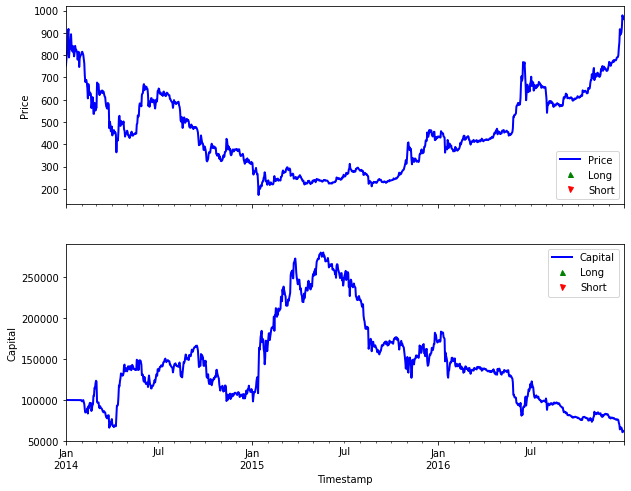

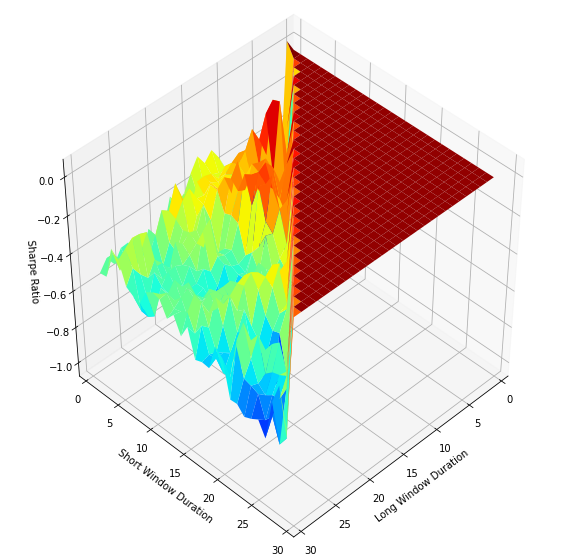

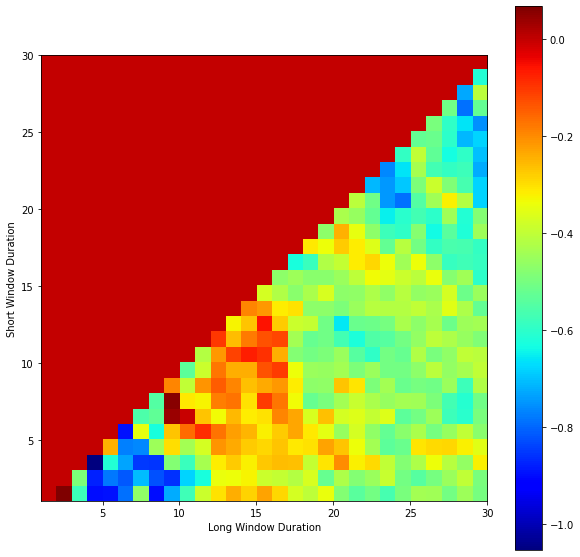

In [4]:
strategy = "Mean Reversion Moving Averages"
trainCryptocurrency = "Bitcoin"
NON_AI_TRAINING_PARAM['name'] = 'btc_mrma_training'
simulator.nonAiTrain(strategy, trainCryptocurrency, NON_AI_TRAINING_PARAM)
print()

╒═══════════════════════════╤═══════════╕
│   Performance Indicator   │   MAMR    │
╞═══════════════════════════╪═══════════╡
│    Profit & Loss (P&L)    │  -95086   │
├───────────────────────────┼───────────┤
│     Annualized Return     │ -100.00%  │
├───────────────────────────┼───────────┤
│   Annualized Volatility   │  48.38%   │
├───────────────────────────┼───────────┤
│       Sharpe Ratio        │  -0.369   │
├───────────────────────────┼───────────┤
│       Sortino Ratio       │  -0.403   │
├───────────────────────────┼───────────┤
│     Maximum Drawdown      │  98.24%   │
├───────────────────────────┼───────────┤
│ Maximum Drawdown Duration │ 1762 days │
├───────────────────────────┼───────────┤
│       Profitability       │  62.61%   │
├───────────────────────────┼───────────┤
│ Ratio Average Profit/Loss │   0.553   │
├───────────────────────────┼───────────┤
│         Skewness          │  -0.244   │
╘═══════════════════════════╧═══════════╛



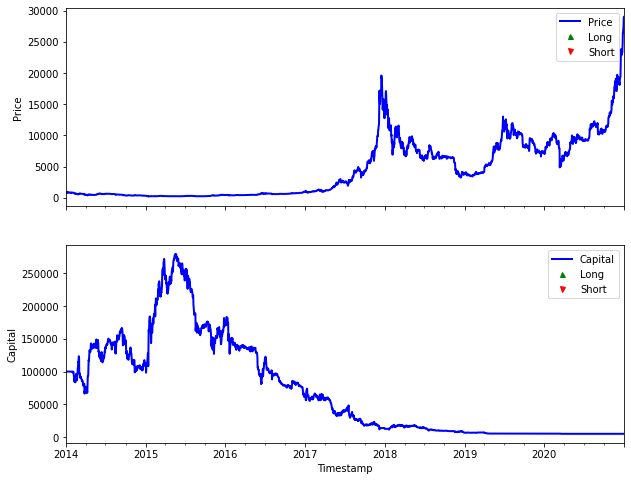

In [5]:
strategy = "Mean Reversion Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
BACKTEST_PARAM['name'] = 'btc_mrma_backtest'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_TRAINING_PARAM, BACKTEST_PARAM)
print()

╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   MAMR   │
╞═══════════════════════════╪══════════╡
│    Profit & Loss (P&L)    │  -89511  │
├───────────────────────────┼──────────┤
│     Annualized Return     │ -100.00% │
├───────────────────────────┼──────────┤
│   Annualized Volatility   │  53.45%  │
├───────────────────────────┼──────────┤
│       Sharpe Ratio        │  -1.172  │
├───────────────────────────┼──────────┤
│       Sortino Ratio       │  -1.265  │
├───────────────────────────┼──────────┤
│     Maximum Drawdown      │  90.87%  │
├───────────────────────────┼──────────┤
│ Maximum Drawdown Duration │ 576 days │
├───────────────────────────┼──────────┤
│       Profitability       │  50.94%  │
├───────────────────────────┼──────────┤
│ Ratio Average Profit/Loss │  0.652   │
├───────────────────────────┼──────────┤
│         Skewness          │  -1.325  │
╘═══════════════════════════╧══════════╛



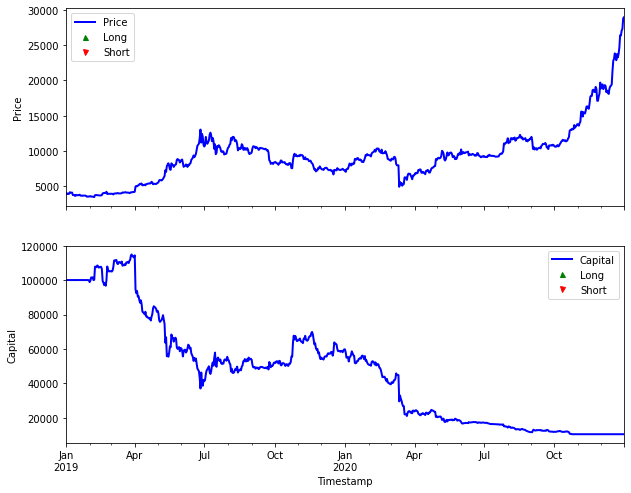

In [6]:
strategy = "Mean Reversion Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
TEST_PARAM['name'] = 'btc_mrma_test'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_TRAINING_PARAM, TEST_PARAM)
print()

In [ ]:
# strategy = "Mean Reversion Moving Averages"
# trainCryptocurrency = "Bitcoin"
# testCryptocurrency = "Ethereum"
# ETH_TEST_PARAM['name'] = 'eth_mrma_test'
# simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_TRAINING_PARAM, ETH_TEST_PARAM)
# print()